In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from copy import copy
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading Data

In [2]:
with open('/kaggle/input/presidential-debate-2-transcript2024/Presidential_Debate_2_Transcript.txt', 'r') as file:
    text = file.read()
    
print(f"Length of transcript text: {len(text)}")

Length of transcript text: 95436


#### Let's take glimpse of the data

In [3]:
text[:1000]

"PARTICIPANTS: Vice President Kamala Harris (D) and Former President Donald Trump (R)\n\nMODERATORS: Linsey Davis (ABC News) and David Muir (ABC News)\n\nMUIR:  Good evening, I'm David Muir. And thank you for joining us for tonight's ABC News Presidential Debate. We want to welcome viewers watching on ABC and around the world tonight. Vice President Kamala Harris and President Donald Trump are just moments away from taking the stage in this unprecedented race for president.\n\nDAVIS:  And I'm Linsey Davis. Tonight's meeting could be the most consequential event of their campaigns, with Election Day now less than two months away. For Vice President Kamala Harris, this is her first debate since President Biden withdrew from the race on July 21st. Of course, that decision followed his debate against President Donald Trump in June. Since then, this race has taken on an entirely new dynamic.\n\nMUIR:  And that brings us to the rules of tonight's debate: 90 minutes with two commercial breaks

### Let's explore the data and answer the following questions:
#### 1. Number of times each participant has spoken
#### 2. Most used words in the debate

paragraphs: 221


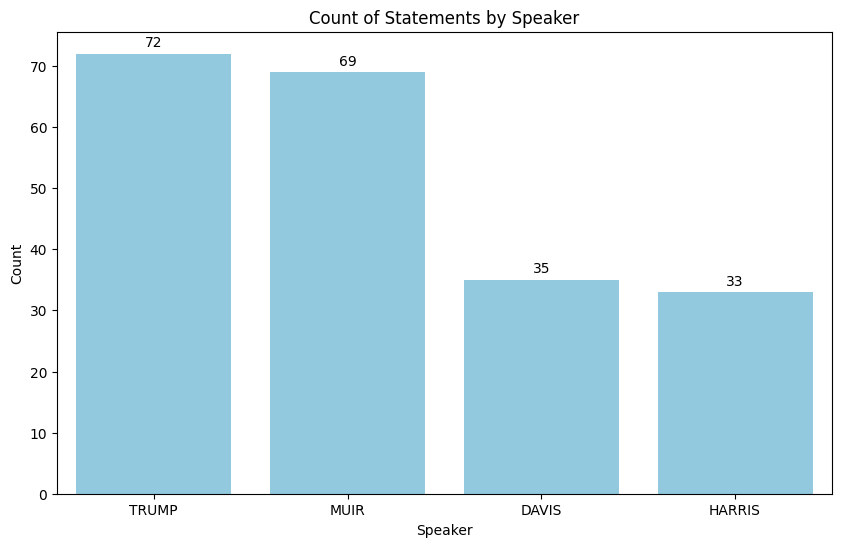

In [4]:
regex_list = ["TRUMP:", "HARRIS:", "MUIR:", "DAVIS:"]
group = 0
counts = {}

# Split the text into paragraphs
texts = text.split("\n\n")
print(f"paragraphs: {len(texts)}")

# Count occurrences of each speaker
for regex in regex_list:
    count = 0
    for text in texts:
        regex_pattern = re.compile(regex, re.UNICODE)
        results = [match.group(group) for match in regex_pattern.finditer(text)]
        count += len(results)
    speaker = regex.rstrip(':')
    counts[speaker] = count
    

# Create a DataFrame for visualization
df = pd.DataFrame(list(counts.items()), columns=['Speaker', 'Count'])
df = df.sort_values(by='Count', ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Speaker', y='Count', data=df, color='skyblue')  # Set bar color to skyblue

# Add counts at the top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 8), 
                textcoords = 'offset points')

plt.title('Count of Statements by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.show()

##### Wordcloud for the debate


##### top 10 words for trump and harris

Top 10 words for Trump:
{'people': 76, 'going': 59, 'country': 50, 'don': 42, 'know': 31, 'got': 29, 'never': 27, 'look': 26, 'years': 23, 'now': 23}

Top 10 words for Harris:
{'people': 47, 'let': 26, 'american': 25, 'plan': 20, 'know': 20, 'states': 19, 'united': 18, 'actually': 17, 'well': 17, 'going': 17}


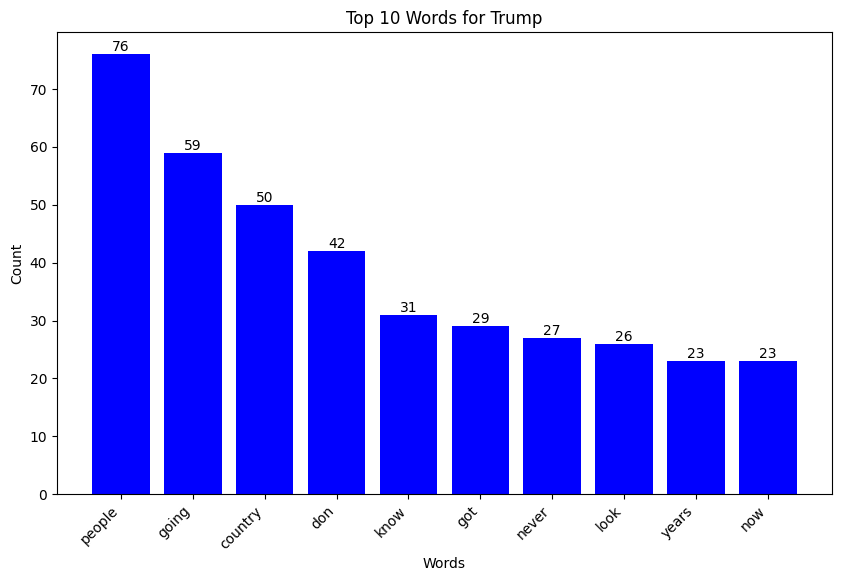

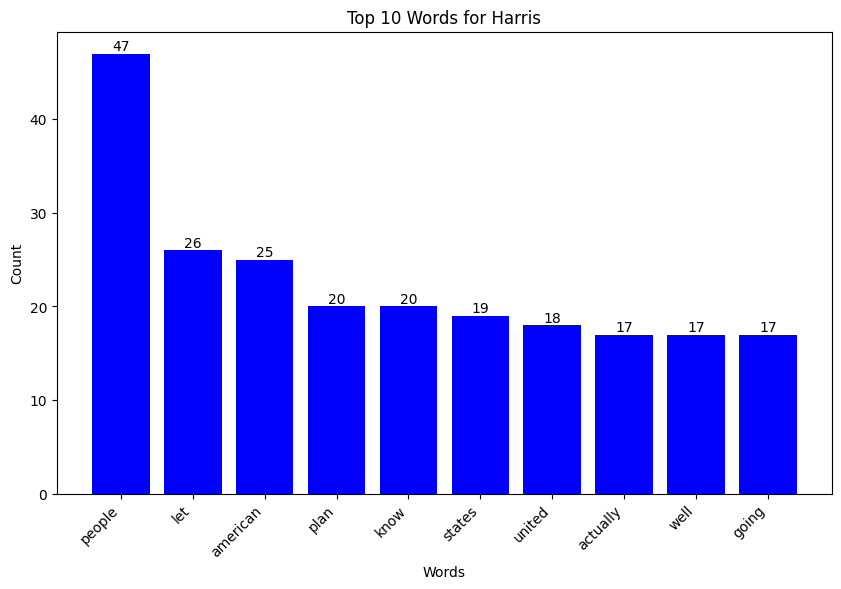

In [5]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Define stopwords
stopwords = set(STOPWORDS)

# Add custom stopwords to exclude common words
custom_stopwords = {'said', 'one', 'will','trump','donald','harris','president'}
stopwords.update(custom_stopwords)

# Function to read text from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to extract text for a specific speaker
def extract_text_for_speaker(text, speaker):
    pattern = re.compile(rf'{speaker}: (.*?)(?:\n[A-Z]+:|\n\n|$)', re.DOTALL)
    matches = pattern.findall(text)
    return ' '.join(matches)

# Function to count words, exclude stopwords, and filter by word length
def count_words(text):
    words = re.findall(r'\b\w{3,}\b', text.lower())  # Filter words with length >= 3
    word_counts = Counter(words)
    filtered_counts = {word: count for word, count in word_counts.items() if word not in stopwords}
    return dict(Counter(filtered_counts).most_common(10))

# Function to plot word counts
def plot_word_counts(word_counts, title):
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    df = df.sort_values(by='Count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'], color='blue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    for i, (word, count) in enumerate(zip(df['Word'], df['Count'])):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

# Main function to process the debate text
def process_debate(file_path):
    text = read_text(file_path)
    
    trump_text = extract_text_for_speaker(text, 'TRUMP')
    harris_text = extract_text_for_speaker(text, 'HARRIS')
    
    trump_word_counts = count_words(trump_text)
    harris_word_counts = count_words(harris_text)
    
    print("Top 10 words for Trump:")
    print(trump_word_counts)
    
    print("\nTop 10 words for Harris:")
    print(harris_word_counts)
    
    plot_word_counts(trump_word_counts, 'Top 10 Words for Trump')
    plot_word_counts(harris_word_counts, 'Top 10 Words for Harris')

# Replace with the path to your file
file_path = '/kaggle/input/presidential-debate-2-transcript2024/Presidential_Debate_2_Transcript.txt'
process_debate(file_path)


Top 10 words for Trump:
{'people': 76, 'going': 63, 'country': 50, 'know': 31, 'got': 29, 'never': 27, 'look': 26, 'years': 23, 'now': 23, 'done': 22}

Top 10 words for Harris:
{'people': 47, 'let': 26, 'american': 25, 'plan': 20, 'know': 20, 'states': 19, 'united': 18, 'actually': 17, 'well': 17, 'going': 17}


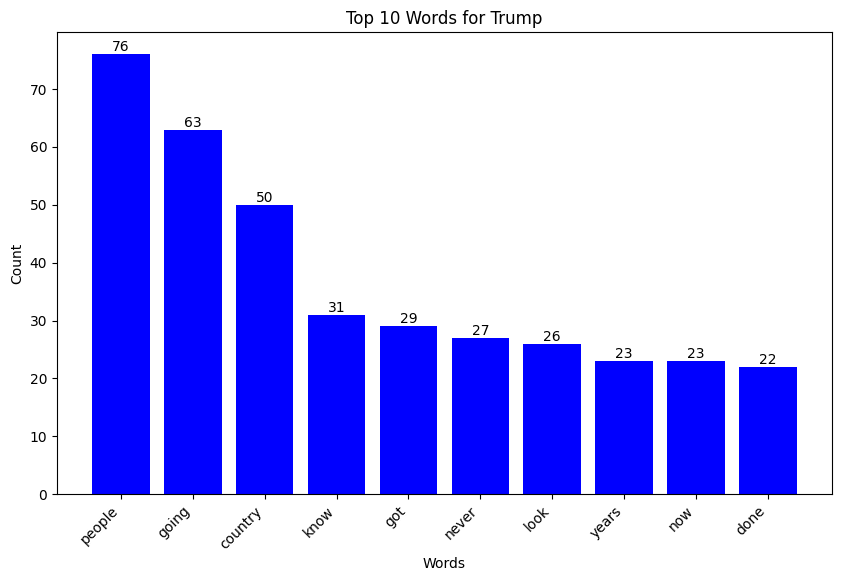

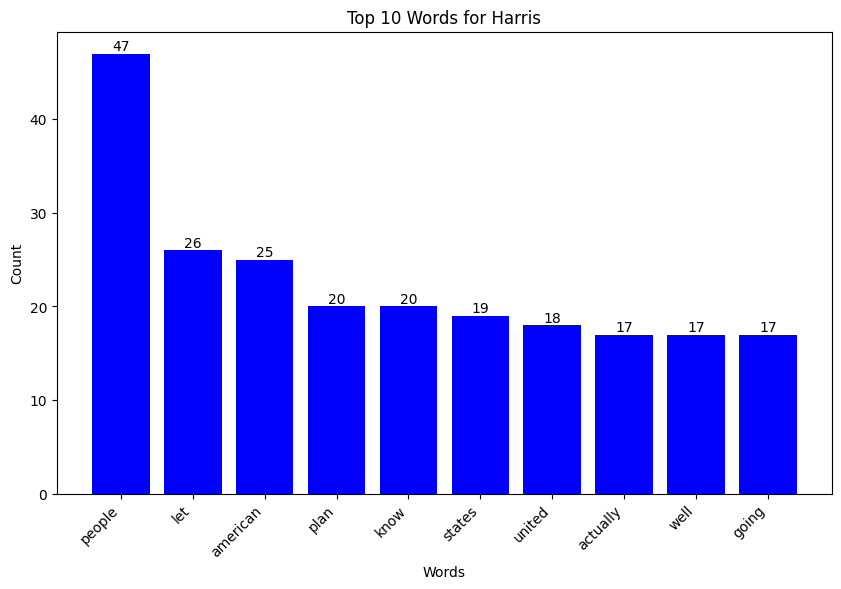

In [6]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import contractions
from wordcloud import STOPWORDS

# Define stopwords and add custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'said', 'one', 'will', 'trump','donald','president'}
stopwords.update(custom_stopwords)

# Function to read text from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to extract text for a specific speaker
def extract_text_for_speaker(text, speaker):
    pattern = re.compile(rf'{speaker}: (.*?)(?:\n[A-Z]+:|\n\n|$)', re.DOTALL)
    matches = pattern.findall(text)
    return ' '.join(matches)

# Function to expand contractions and count words
def count_words(text):
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    # Tokenize and count words
    words = re.findall(r'\b\w{3,}\b', expanded_text.lower())  # Filter words with length >= 3
    word_counts = Counter(words)
    
    # Remove stopwords from counts
    filtered_counts = {word: count for word, count in word_counts.items() if word not in stopwords}
    
    return dict(Counter(filtered_counts).most_common(10))

# Function to plot word counts
def plot_word_counts(word_counts, title):
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    df = df.sort_values(by='Count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'], color='blue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    for i, (word, count) in enumerate(zip(df['Word'], df['Count'])):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

# Main function to process the debate text
def process_debate(file_path):
    text = read_text(file_path)
    
    trump_text = extract_text_for_speaker(text, 'TRUMP')
    harris_text = extract_text_for_speaker(text, 'HARRIS')
    
    trump_word_counts = count_words(trump_text)
    harris_word_counts = count_words(harris_text)
    
    print("Top 10 words for Trump:")
    print(trump_word_counts)
    
    print("\nTop 10 words for Harris:")
    print(harris_word_counts)
    
    plot_word_counts(trump_word_counts, 'Top 10 Words for Trump')
    plot_word_counts(harris_word_counts, 'Top 10 Words for Harris')

# Replace with the path to your file
file_path = '/kaggle/input/presidential-debate-2-transcript2024/Presidential_Debate_2_Transcript.txt'
process_debate(file_path)


Top 10 words for Trump:
{'people': 76, 'going': 63, 'country': 50, 'know': 31, 'got': 29, 'president': 28, 'never': 27, 'look': 26, 'years': 23, 'now': 23}

Top 10 words for Harris:
{'president': 51, 'people': 47, 'trump': 37, 'donald': 31, 'let': 26, 'american': 25, 'plan': 20, 'know': 20, 'states': 19, 'united': 18}

Top 10 nouns and proper nouns for Trump:
{'people': 76, 'country': 50, 'president': 28, 'years': 23, 'world': 21, 'things': 18, 'plan': 17, 'millions': 16, 'war': 15, 'biden': 14}

Top 10 nouns and proper nouns for Harris:
{'president': 51, 'people': 47, 'trump': 37, 'donald': 31, 'plan': 20, 'states': 19, 'united': 18, 'america': 16, 'time': 13, 'care': 11}

Top 10 adjectives for Trump:
{'good': 20, 'many': 16, 'bad': 12, 'worst': 9, 'great': 9, 'different': 9, 'big': 8, 'higher': 7, 'afraid': 7, 'better': 6}

Top 10 adjectives for Harris:
{'american': 24, 'former': 15, 'clear': 9, 'small': 7, 'first': 7, 'affordable': 7, 'young': 6, 'important': 6, 'middle': 5, 'many':

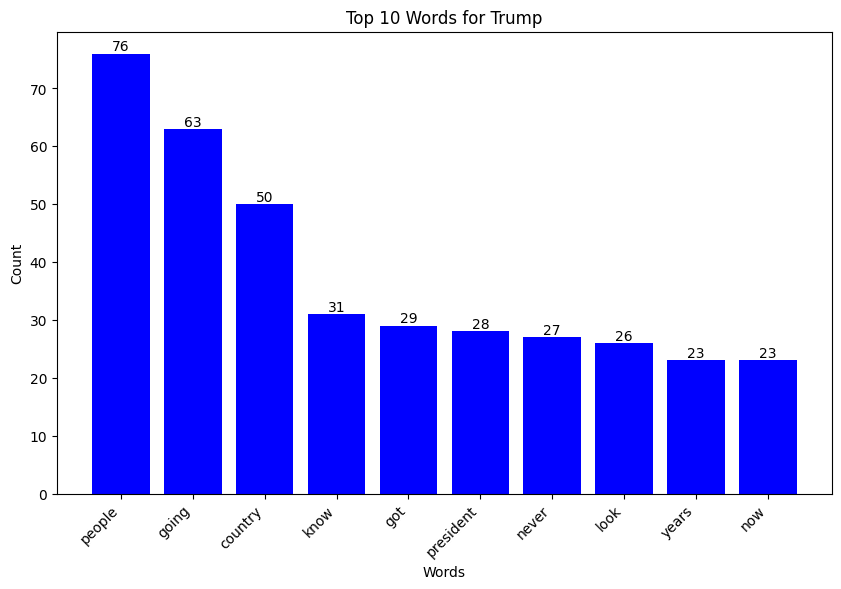

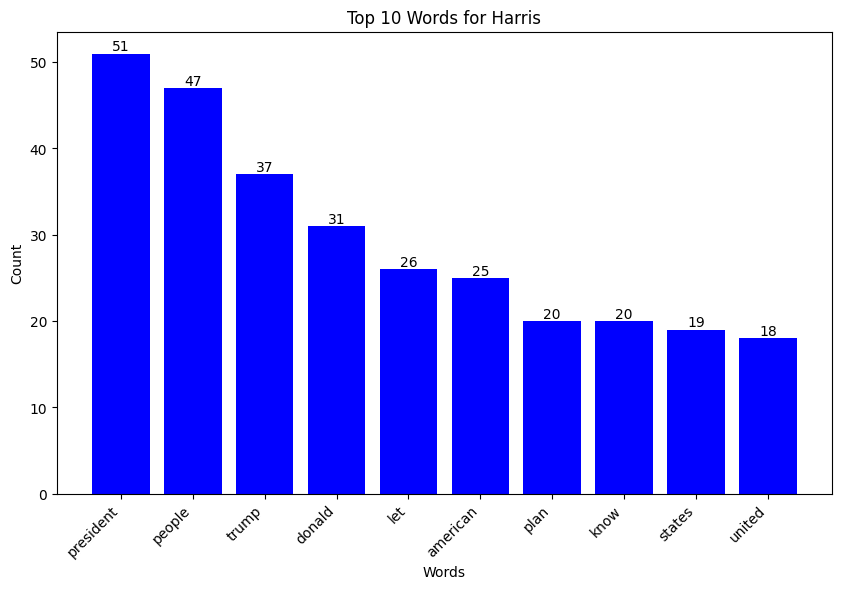

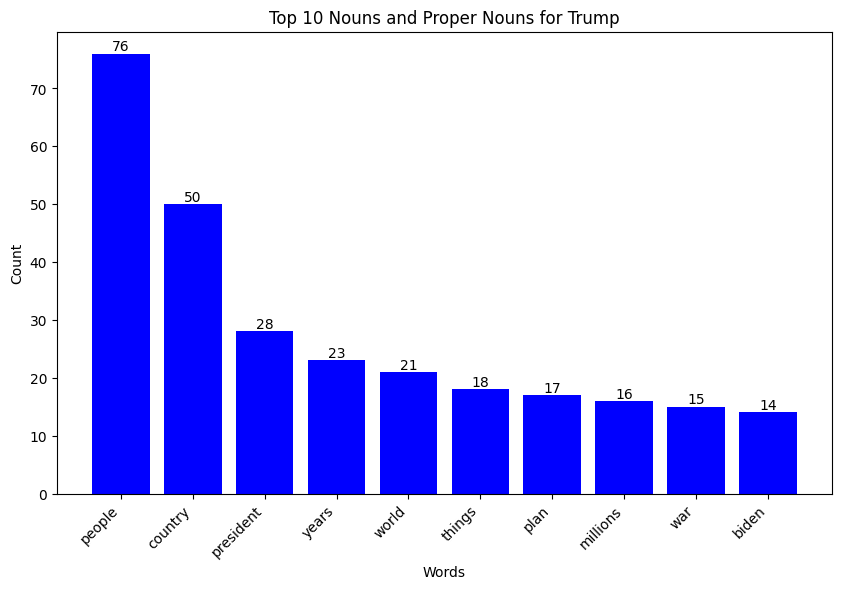

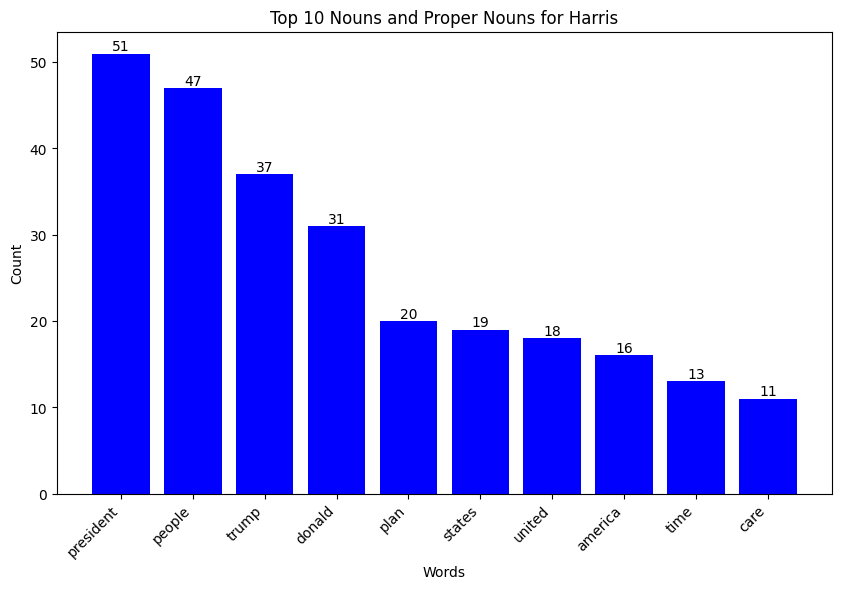

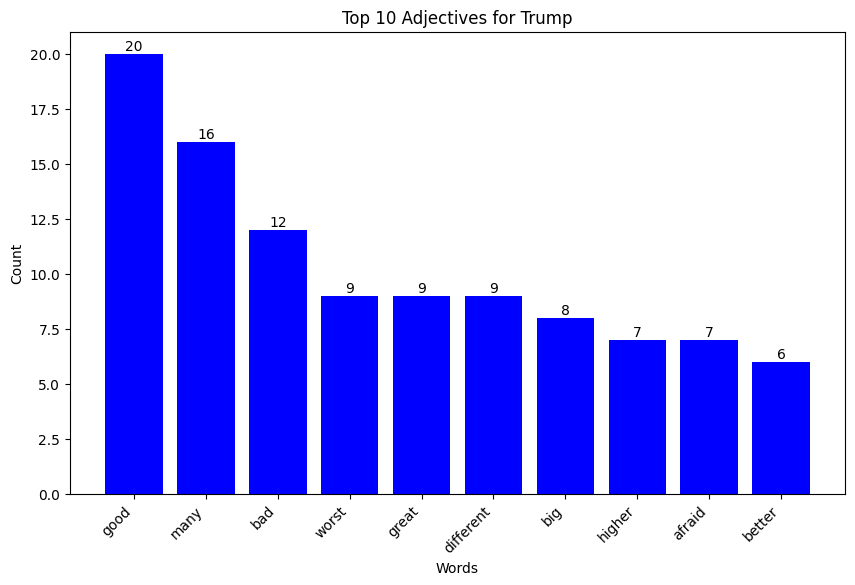

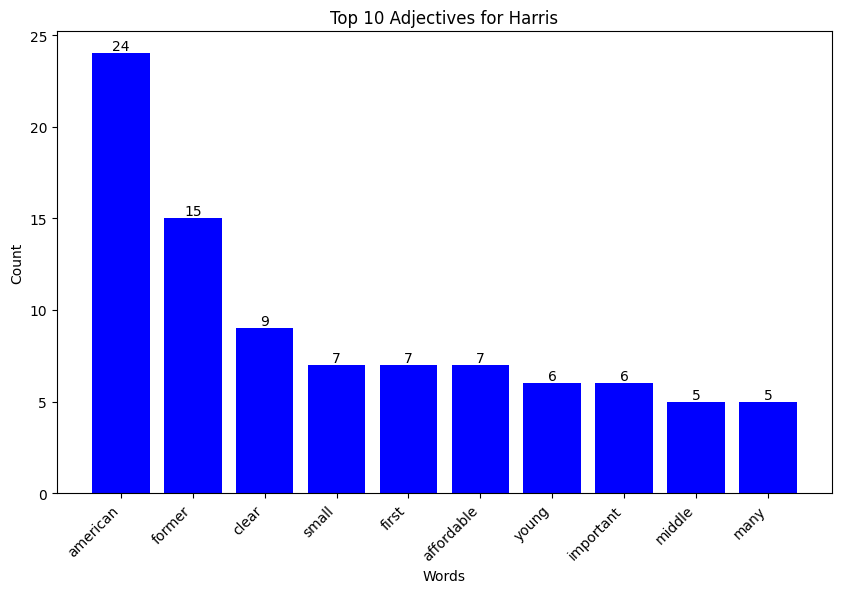

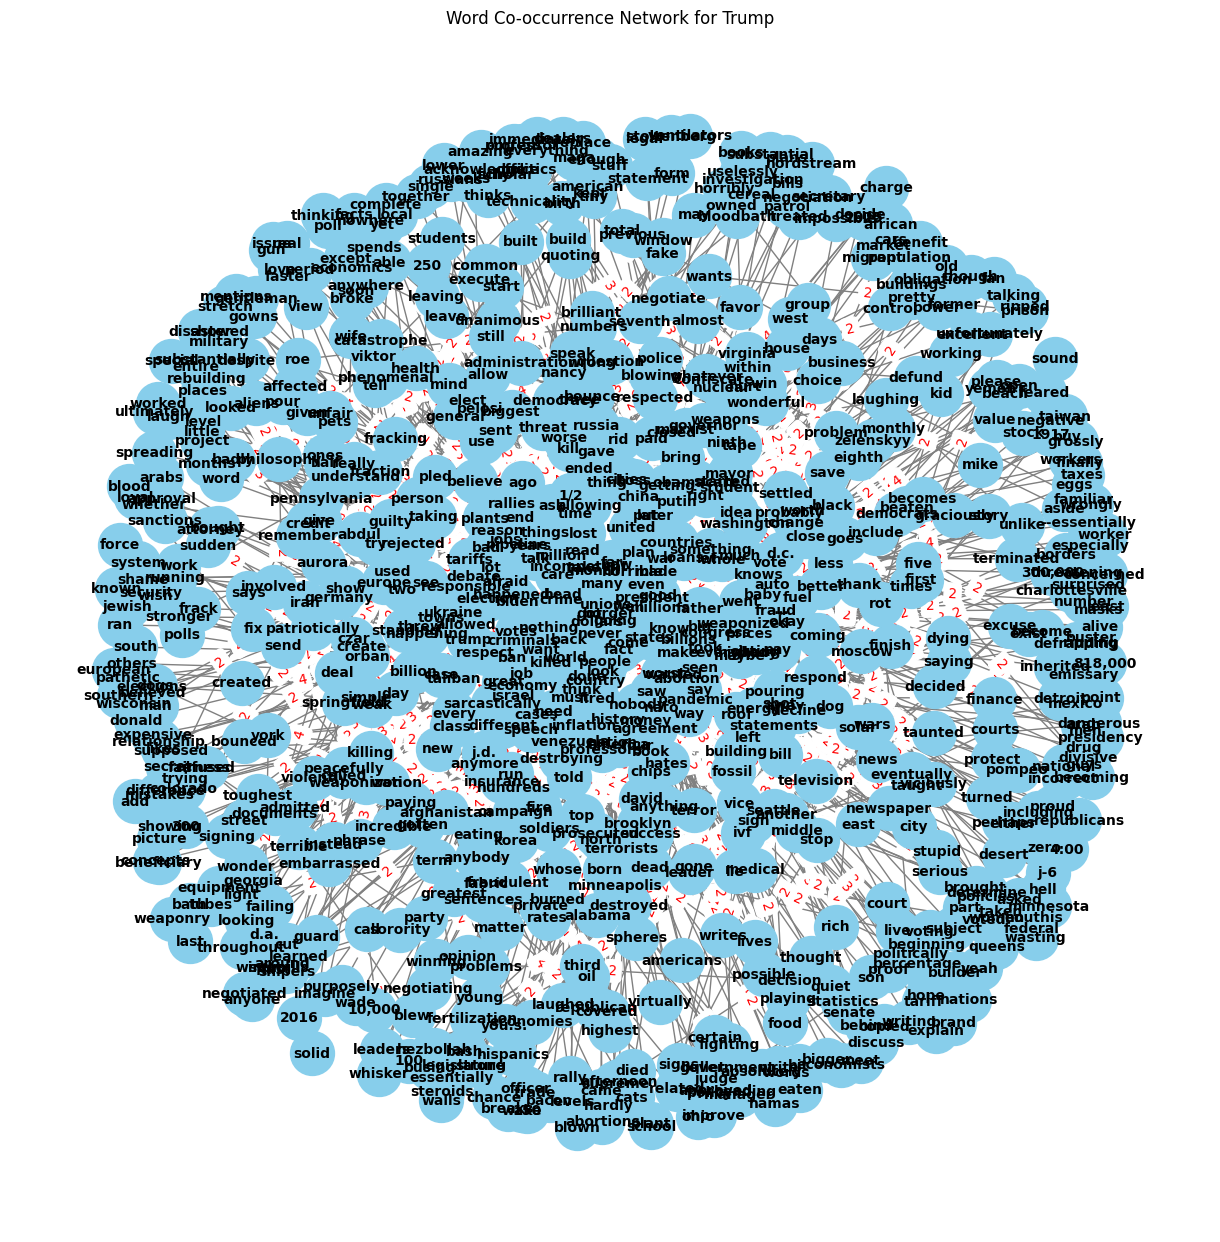

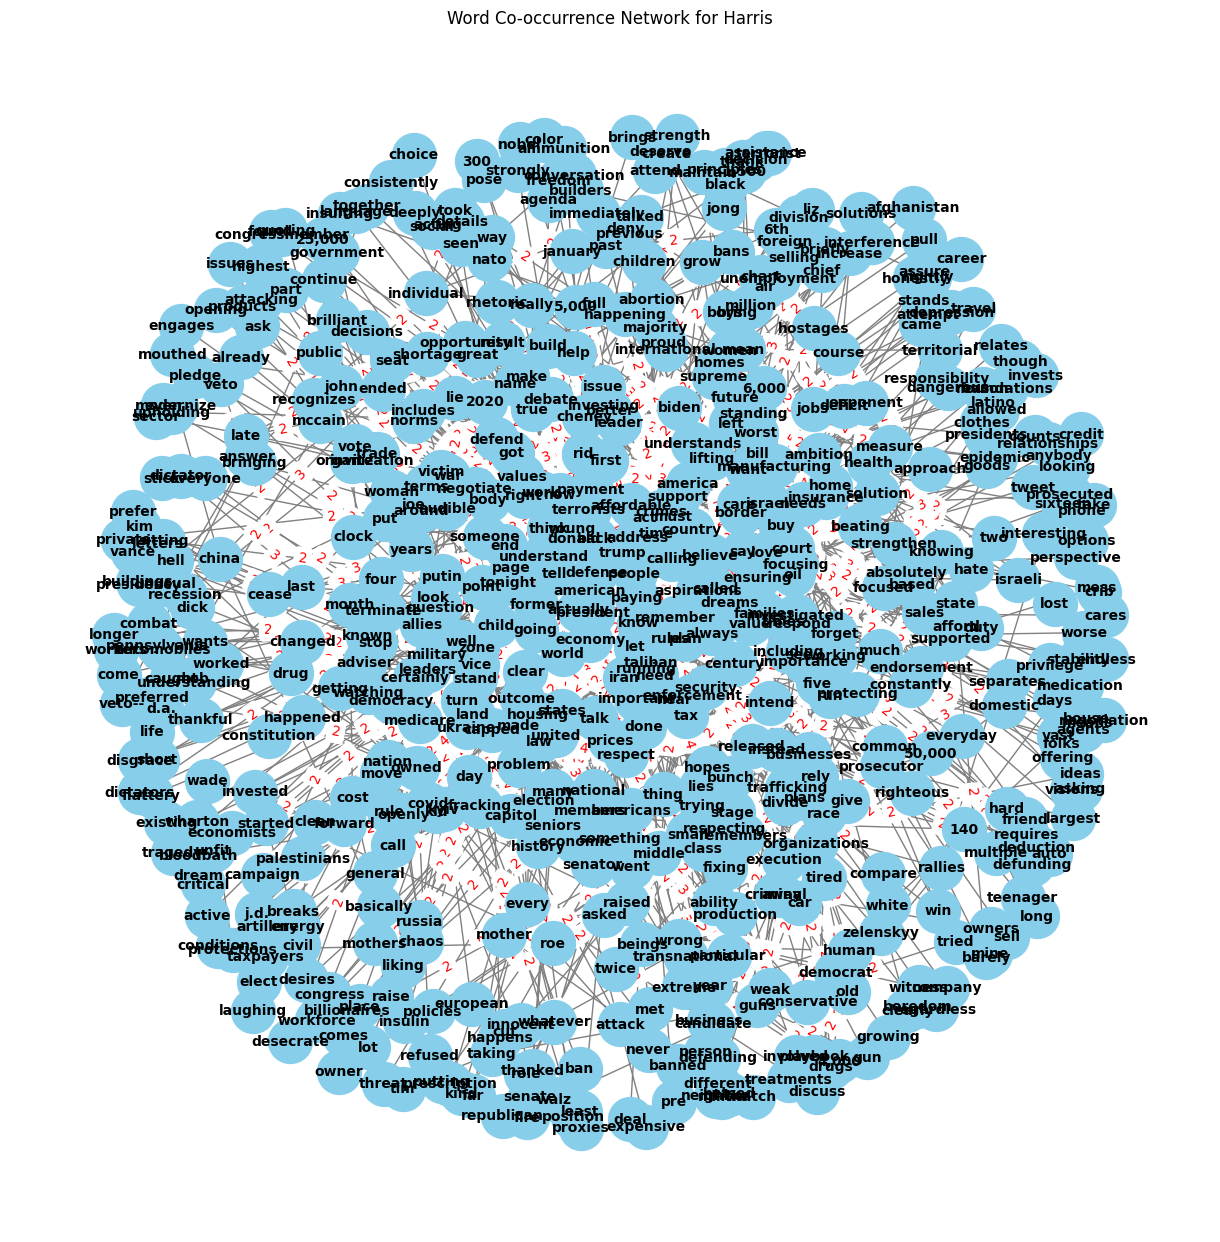

In [7]:
import re
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import contractions
import spacy
import networkx as nx
from wordcloud import STOPWORDS

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define stopwords and add custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'said', 'one', 'will'}
stopwords.update(custom_stopwords)

# Function to read text from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to extract text for a specific speaker
def extract_text_for_speaker(text, speaker):
    pattern = re.compile(rf'{speaker}: (.*?)(?:\n[A-Z]+:|\n\n|$)', re.DOTALL)
    matches = pattern.findall(text)
    return ' '.join(matches)

# Function to expand contractions and count words
def count_words(text):
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    # Tokenize and count words
    words = re.findall(r'\b\w{3,}\b', expanded_text.lower())  # Filter words with length >= 3
    word_counts = Counter(words)
    
    # Remove stopwords from counts
    filtered_counts = {word: count for word, count in word_counts.items() if word not in stopwords}
    
    return dict(Counter(filtered_counts).most_common(10))

# Function to extract and count nouns, proper nouns, and adjectives
def count_pos(text, pos_tags):
    doc = nlp(text)
    
    pos_counts = Counter()
    
    for token in doc:
        if token.pos_ in pos_tags:
            if token.text.lower() not in stopwords and len(token.text) > 2:
                pos_counts[token.text.lower()] += 1
    
    return dict(Counter(pos_counts).most_common(10))

# Function to compute word co-occurrences
def count_word_cooccurrences(text, window_size=5):
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    # Tokenize the text
    doc = nlp(expanded_text)
    
    # Filter tokens
    tokens = [token.text.lower() for token in doc if token.text.lower() not in stopwords and len(token.text) > 2]
    
    # Compute co-occurrences
    cooccurrence_counts = defaultdict(Counter)
    
    for i, word in enumerate(tokens):
        window = tokens[max(0, i - window_size):i] + tokens[i + 1:i + 1 + window_size]
        for neighbor in window:
            if word != neighbor:
                cooccurrence_counts[word][neighbor] += 1
    
    return cooccurrence_counts

# Function to plot word counts
def plot_word_counts(word_counts, title):
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    df = df.sort_values(by='Count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'], color='blue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    for i, (word, count) in enumerate(zip(df['Word'], df['Count'])):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

# Function to plot co-occurrences network graph
def plot_cooccurrence_network(cooccurrence_counts, title):
    G = nx.Graph()
    
    # Add nodes and edges
    for word, neighbors in cooccurrence_counts.items():
        for neighbor, count in neighbors.items():
            if count > 1:  # Filter out low-frequency co-occurrences
                G.add_edge(word, neighbor, weight=count)
    
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.show()

# Main function to process the debate text
def process_debate(file_path):
    text = read_text(file_path)
    
    trump_text = extract_text_for_speaker(text, 'TRUMP')
    harris_text = extract_text_for_speaker(text, 'HARRIS')
    
    trump_word_counts = count_words(trump_text)
    harris_word_counts = count_words(harris_text)
    
    trump_nouns = count_pos(trump_text, {'NOUN', 'PROPN'})
    harris_nouns = count_pos(harris_text, {'NOUN', 'PROPN'})
    
    trump_adjectives = count_pos(trump_text, {'ADJ'})
    harris_adjectives = count_pos(harris_text, {'ADJ'})
    
    trump_cooccurrences = count_word_cooccurrences(trump_text)
    harris_cooccurrences = count_word_cooccurrences(harris_text)
    
    print("Top 10 words for Trump:")
    print(trump_word_counts)
    
    print("\nTop 10 words for Harris:")
    print(harris_word_counts)
    
    print("\nTop 10 nouns and proper nouns for Trump:")
    print(trump_nouns)
    
    print("\nTop 10 nouns and proper nouns for Harris:")
    print(harris_nouns)
    
    print("\nTop 10 adjectives for Trump:")
    print(trump_adjectives)
    
    print("\nTop 10 adjectives for Harris:")
    print(harris_adjectives)
    
    plot_word_counts(trump_word_counts, 'Top 10 Words for Trump')
    plot_word_counts(harris_word_counts, 'Top 10 Words for Harris')

    plot_word_counts(trump_nouns, 'Top 10 Nouns and Proper Nouns for Trump')
    plot_word_counts(harris_nouns, 'Top 10 Nouns and Proper Nouns for Harris')

    plot_word_counts(trump_adjectives, 'Top 10 Adjectives for Trump')
    plot_word_counts(harris_adjectives, 'Top 10 Adjectives for Harris')

    plot_cooccurrence_network(trump_cooccurrences, 'Word Co-occurrence Network for Trump')
    plot_cooccurrence_network(harris_cooccurrences, 'Word Co-occurrence Network for Harris')

# Replace with the path to your file
file_path = '/kaggle/input/presidential-debate-2-transcript2024/Presidential_Debate_2_Transcript.txt'
process_debate(file_path)


Top 10 words for Trump:
{'people': 76, 'going': 63, 'country': 50, 'know': 31, 'got': 29, 'president': 28, 'never': 27, 'look': 26, 'years': 23, 'now': 23}

Top 10 words for Harris:
{'president': 51, 'people': 47, 'trump': 37, 'donald': 31, 'let': 26, 'american': 25, 'plan': 20, 'know': 20, 'states': 19, 'united': 18}

Top 10 nouns and proper nouns for Trump:
{'people': 76, 'country': 50, 'president': 28, 'years': 23, 'world': 21, 'things': 18, 'plan': 17, 'millions': 16, 'war': 15, 'biden': 14}

Top 10 nouns and proper nouns for Harris:
{'president': 51, 'people': 47, 'trump': 37, 'donald': 31, 'plan': 20, 'states': 19, 'united': 18, 'america': 16, 'time': 13, 'care': 11}

Top 10 adjectives for Trump:
{'good': 20, 'many': 16, 'bad': 12, 'worst': 9, 'great': 9, 'different': 9, 'big': 8, 'higher': 7, 'afraid': 7, 'better': 6}

Top 10 adjectives for Harris:
{'american': 24, 'former': 15, 'clear': 9, 'small': 7, 'first': 7, 'affordable': 7, 'young': 6, 'important': 6, 'middle': 5, 'many':

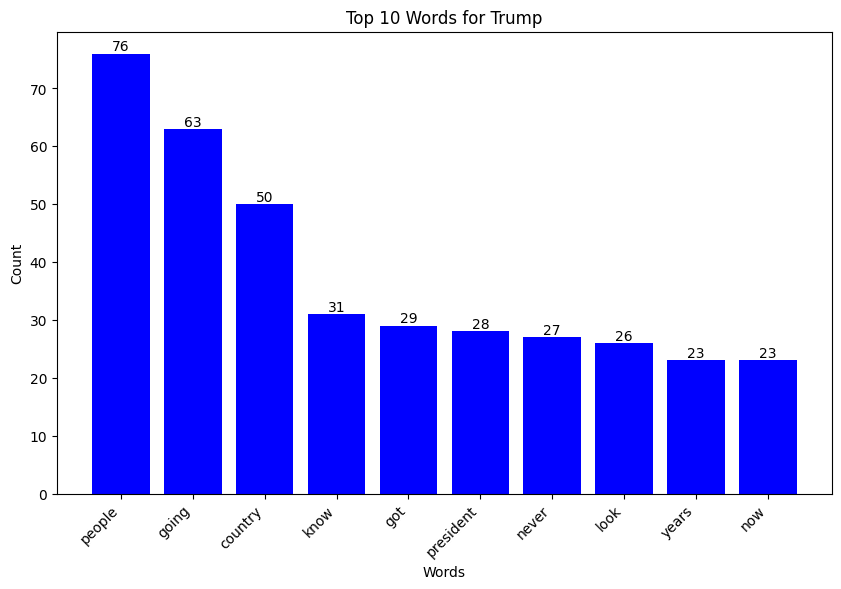

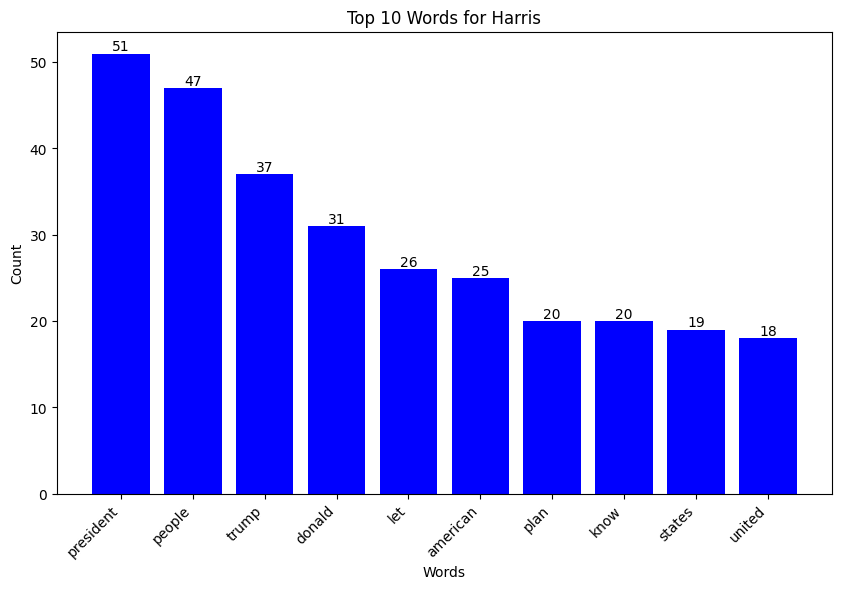

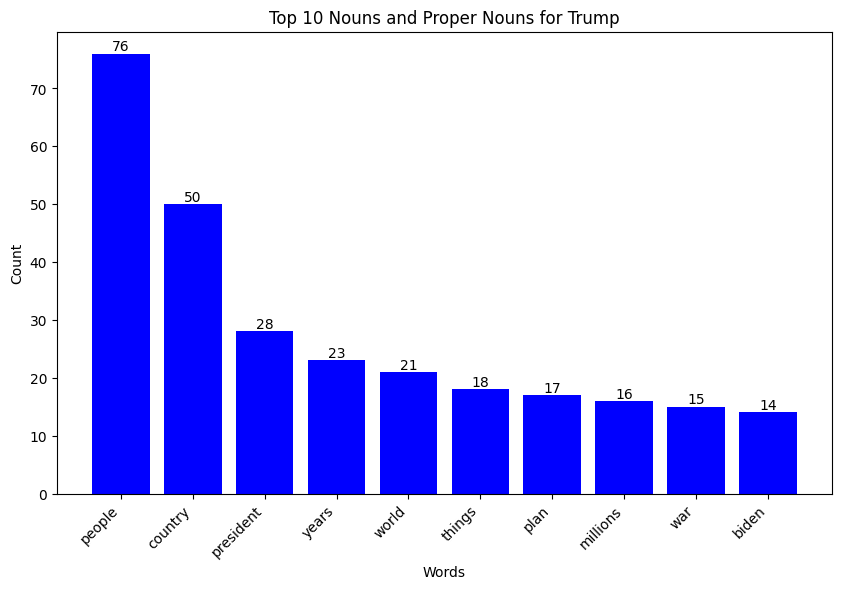

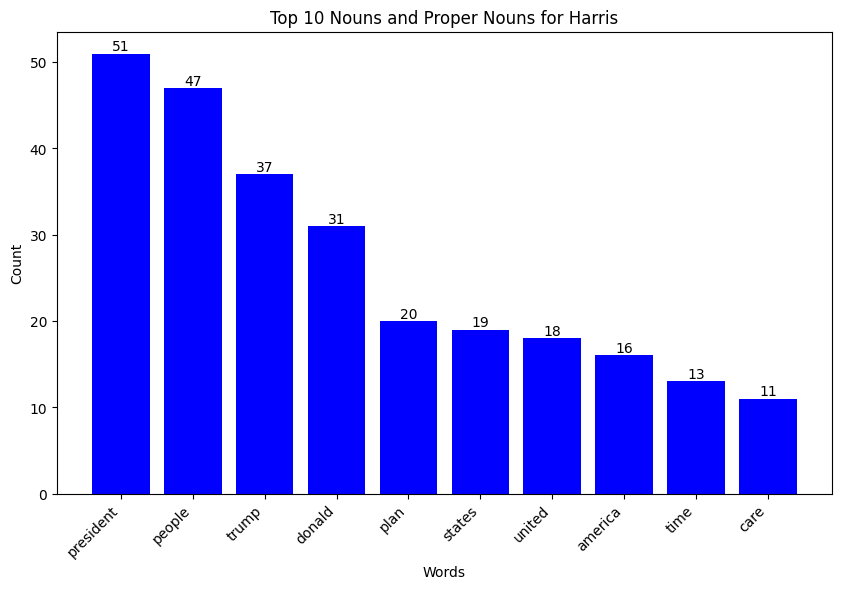

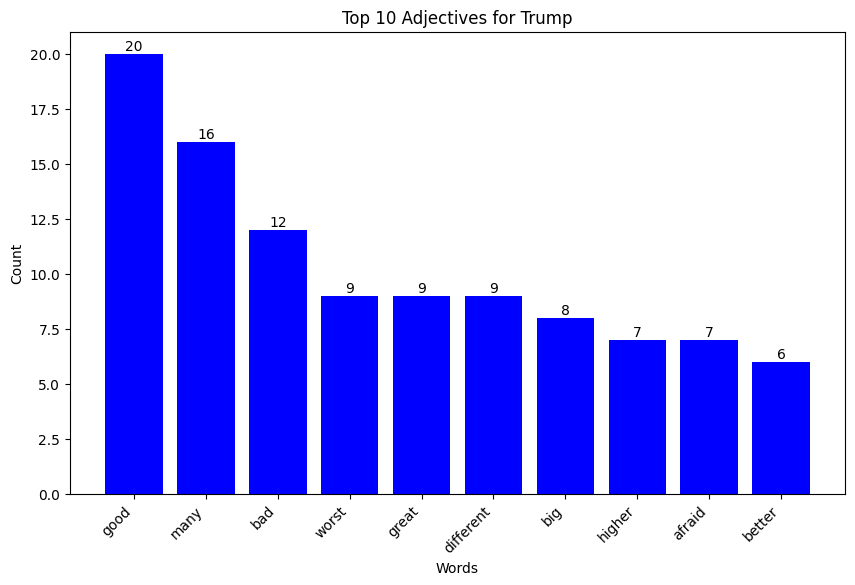

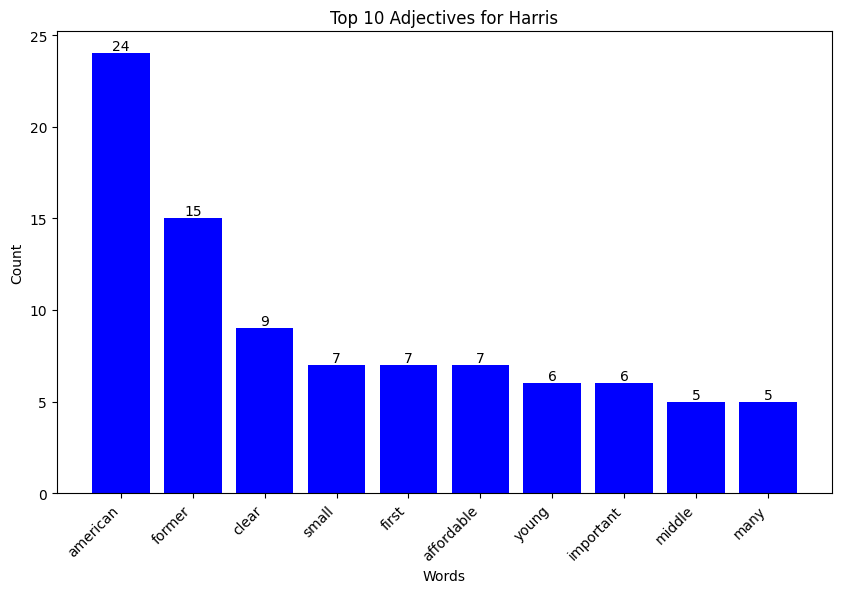

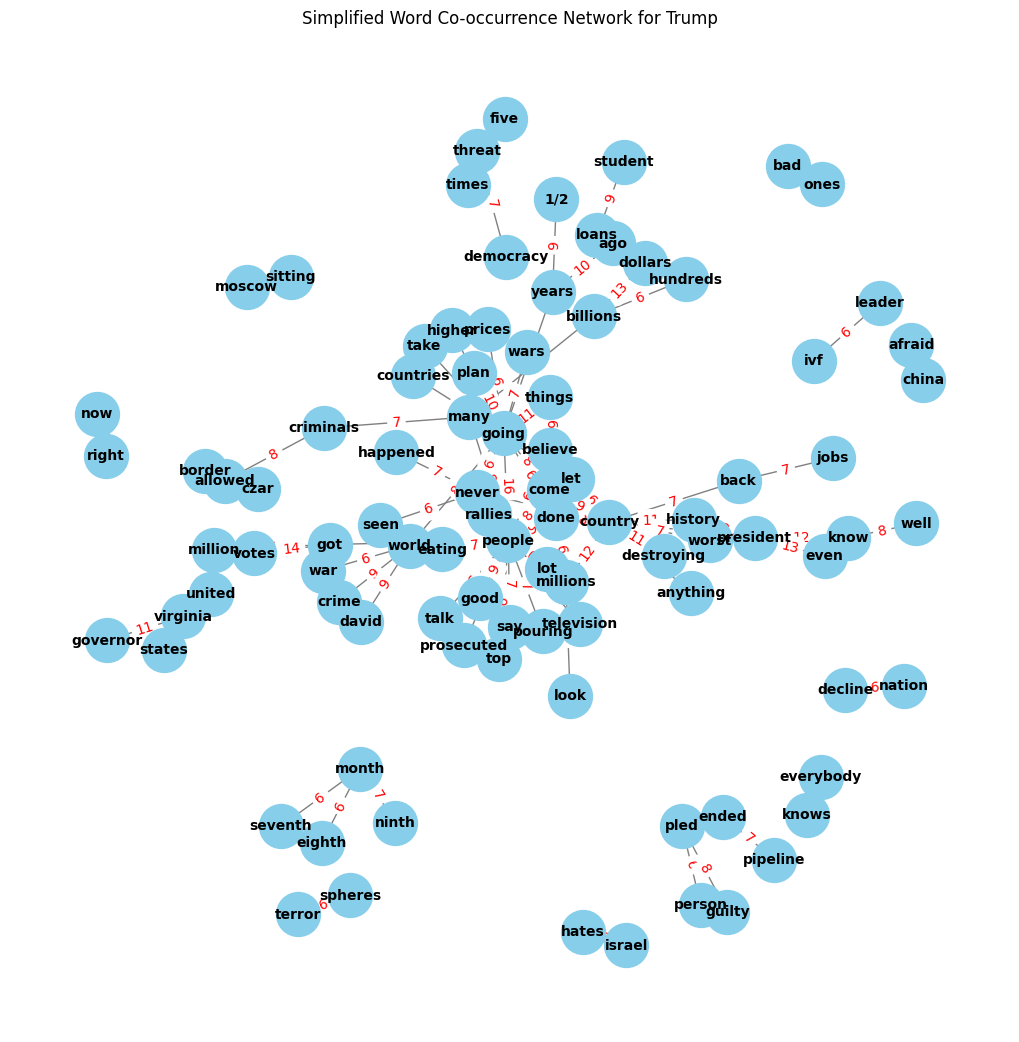

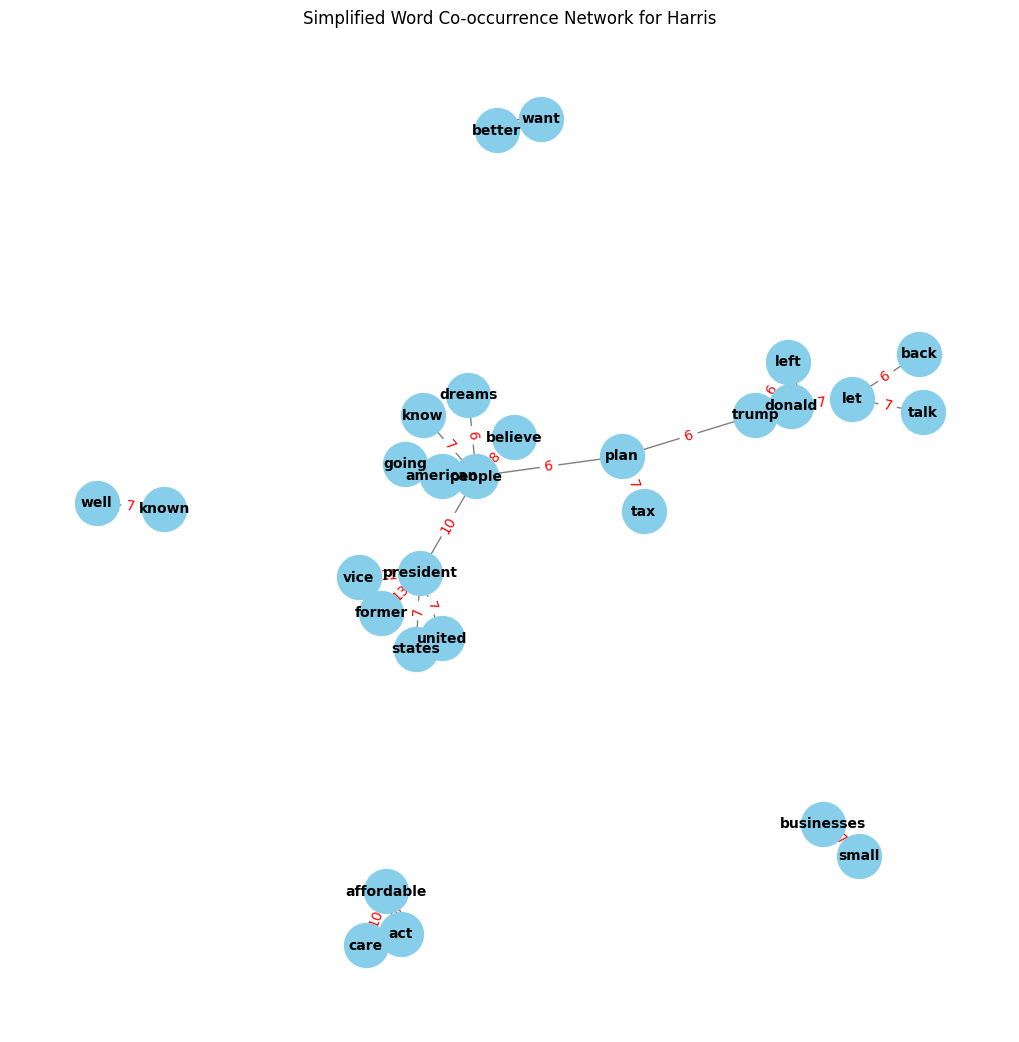

In [8]:
import re
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import contractions
import spacy
import networkx as nx
from wordcloud import STOPWORDS

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define stopwords and add custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'said', 'one', 'will'}
stopwords.update(custom_stopwords)

# Function to read text from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to extract text for a specific speaker
def extract_text_for_speaker(text, speaker):
    pattern = re.compile(rf'{speaker}: (.*?)(?:\n[A-Z]+:|\n\n|$)', re.DOTALL)
    matches = pattern.findall(text)
    return ' '.join(matches)

# Function to expand contractions and count words
def count_words(text):
    expanded_text = contractions.fix(text)
    words = re.findall(r'\b\w{3,}\b', expanded_text.lower())
    word_counts = Counter(words)
    filtered_counts = {word: count for word, count in word_counts.items() if word not in stopwords}
    return dict(Counter(filtered_counts).most_common(10))

# Function to extract and count nouns, proper nouns, and adjectives
def count_pos(text, pos_tags):
    doc = nlp(text)
    pos_counts = Counter()
    for token in doc:
        if token.pos_ in pos_tags and token.text.lower() not in stopwords and len(token.text) > 2:
            pos_counts[token.text.lower()] += 1
    return dict(Counter(pos_counts).most_common(10))

# Function to compute word co-occurrences
def count_word_cooccurrences(text, window_size=5):
    expanded_text = contractions.fix(text)
    doc = nlp(expanded_text)
    tokens = [token.text.lower() for token in doc if token.text.lower() not in stopwords and len(token.text) > 2]
    cooccurrence_counts = defaultdict(Counter)
    for i, word in enumerate(tokens):
        window = tokens[max(0, i - window_size):i] + tokens[i + 1:i + 1 + window_size]
        for neighbor in window:
            if word != neighbor:
                cooccurrence_counts[word][neighbor] += 1
    return cooccurrence_counts

# Function to plot word counts
def plot_word_counts(word_counts, title):
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    df = df.sort_values(by='Count', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'], color='blue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    for i, (word, count) in enumerate(zip(df['Word'], df['Count'])):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

# Function to plot a simplified co-occurrence network graph
def plot_simplified_cooccurrence_network(cooccurrence_counts, title, threshold=5):
    G = nx.Graph()
    for word, neighbors in cooccurrence_counts.items():
        for neighbor, count in neighbors.items():
            if count > threshold:
                G.add_edge(word, neighbor, weight=count)
    
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.show()

# Main function to process the debate text
def process_debate(file_path):
    text = read_text(file_path)
    
    trump_text = extract_text_for_speaker(text, 'TRUMP')
    harris_text = extract_text_for_speaker(text, 'HARRIS')
    
    trump_word_counts = count_words(trump_text)
    harris_word_counts = count_words(harris_text)
    
    trump_nouns = count_pos(trump_text, {'NOUN', 'PROPN'})
    harris_nouns = count_pos(harris_text, {'NOUN', 'PROPN'})
    
    trump_adjectives = count_pos(trump_text, {'ADJ'})
    harris_adjectives = count_pos(harris_text, {'ADJ'})
    
    trump_cooccurrences = count_word_cooccurrences(trump_text)
    harris_cooccurrences = count_word_cooccurrences(harris_text)
    
    print("Top 10 words for Trump:")
    print(trump_word_counts)
    
    print("\nTop 10 words for Harris:")
    print(harris_word_counts)
    
    print("\nTop 10 nouns and proper nouns for Trump:")
    print(trump_nouns)
    
    print("\nTop 10 nouns and proper nouns for Harris:")
    print(harris_nouns)
    
    print("\nTop 10 adjectives for Trump:")
    print(trump_adjectives)
    
    print("\nTop 10 adjectives for Harris:")
    print(harris_adjectives)
    
    plot_word_counts(trump_word_counts, 'Top 10 Words for Trump')
    plot_word_counts(harris_word_counts, 'Top 10 Words for Harris')

    plot_word_counts(trump_nouns, 'Top 10 Nouns and Proper Nouns for Trump')
    plot_word_counts(harris_nouns, 'Top 10 Nouns and Proper Nouns for Harris')

    plot_word_counts(trump_adjectives, 'Top 10 Adjectives for Trump')
    plot_word_counts(harris_adjectives, 'Top 10 Adjectives for Harris')

    plot_simplified_cooccurrence_network(trump_cooccurrences, 'Simplified Word Co-occurrence Network for Trump')
    plot_simplified_cooccurrence_network(harris_cooccurrences, 'Simplified Word Co-occurrence Network for Harris')

# Replace with the path to your file
file_path = '/kaggle/input/presidential-debate-2-transcript2024/Presidential_Debate_2_Transcript.txt'
process_debate(file_path)
